In [1]:
# for CNN refer this : 
# https://github.com/SUBHASISHBISWAS/SB-AI-DEV/blob/b130d80a880ac429b3d8f7f0eed887fcd9850512/DL/CNN/Pluralsight/Janani%20Ravi/Building%20Deep%20Learning%20Models%20Using%20PyTorch/SB/8-Building%20an%20Image%20Classification%20Model.ipynb

from IPython.display import Image

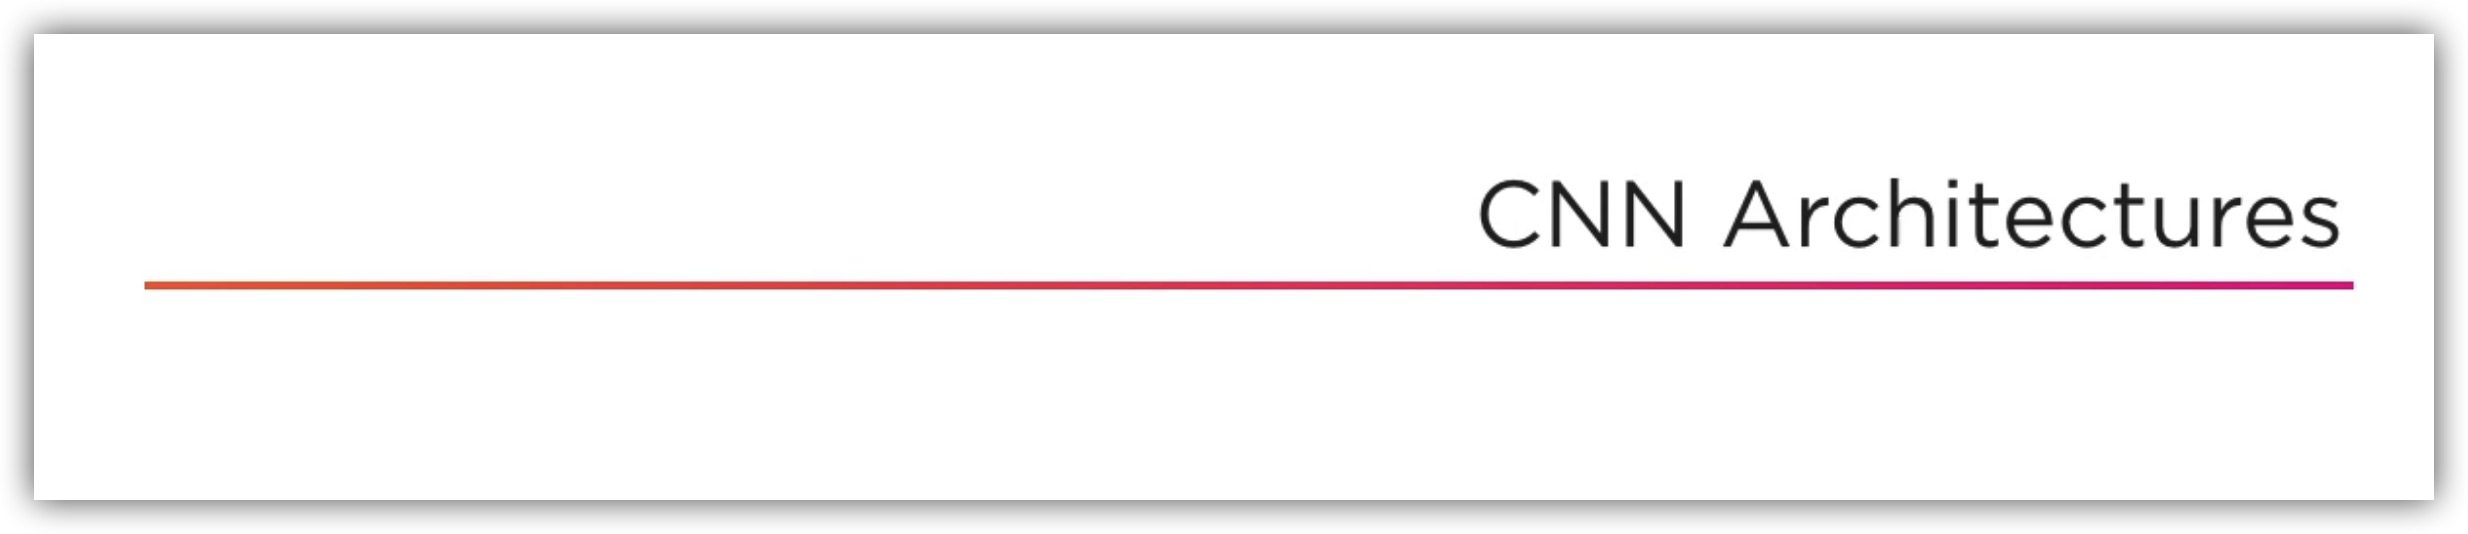

In [2]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_20-57-55.jpg')

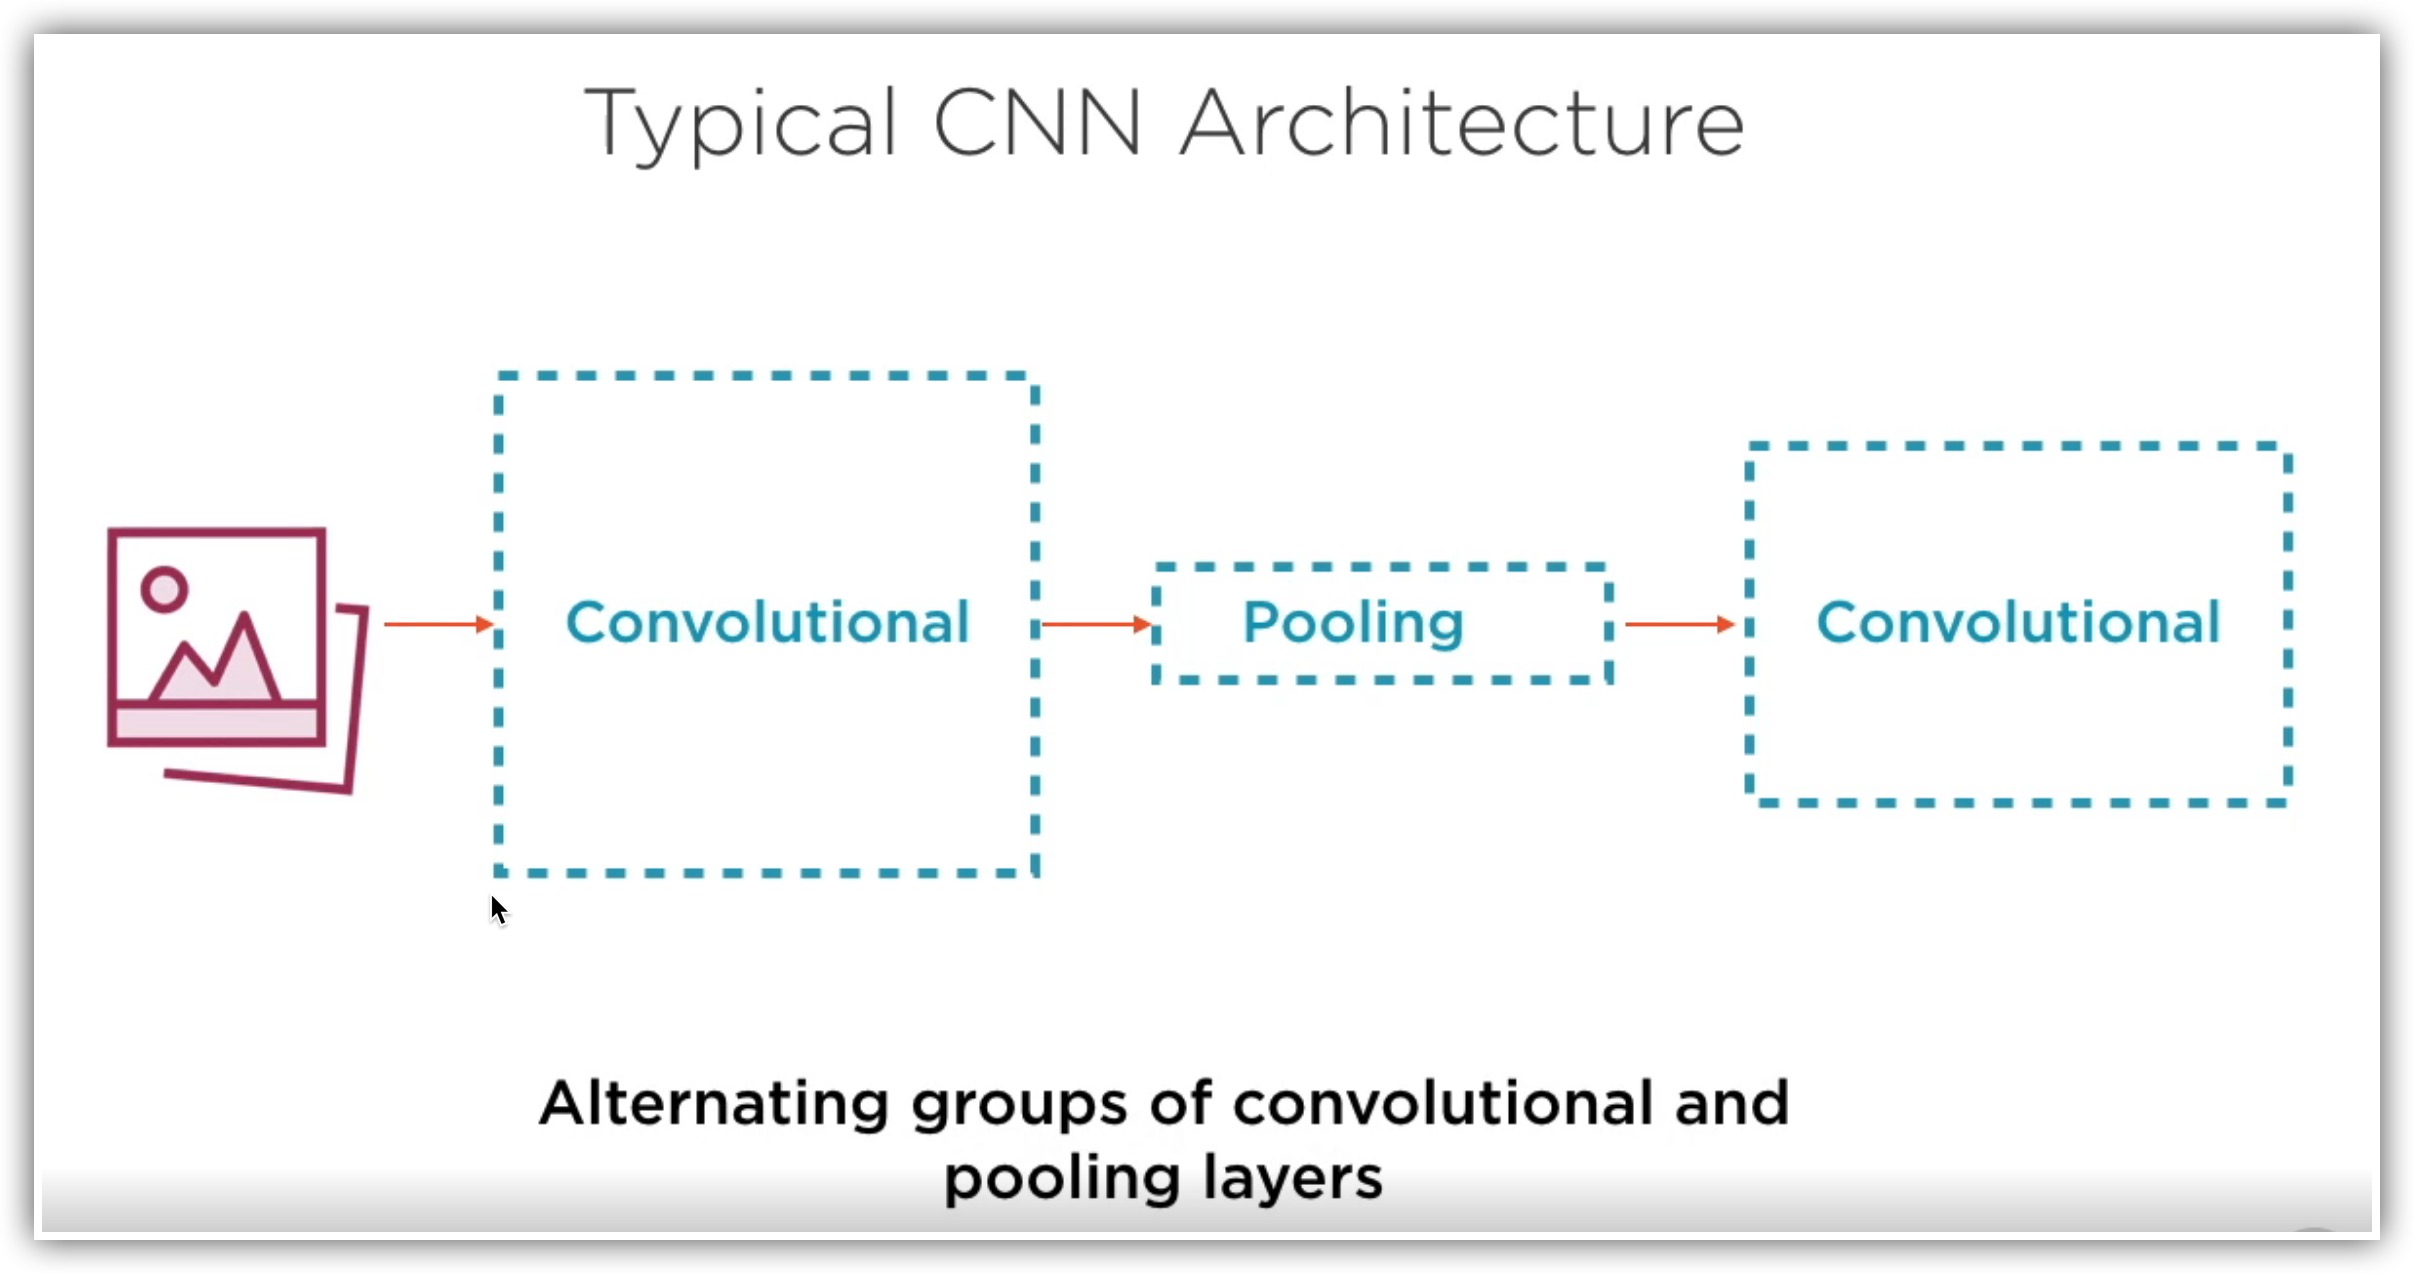

In [3]:
'''
The typical architecture of a CNN involves alternating groups of convolutional and pooling layers. 
So you'll pass the input through one or more convolutional layers. 

It will be followed by a pooling layer. 
The output of the pooling layer is passed on to more convolutional and pooling layers. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_20-59-02.jpg')

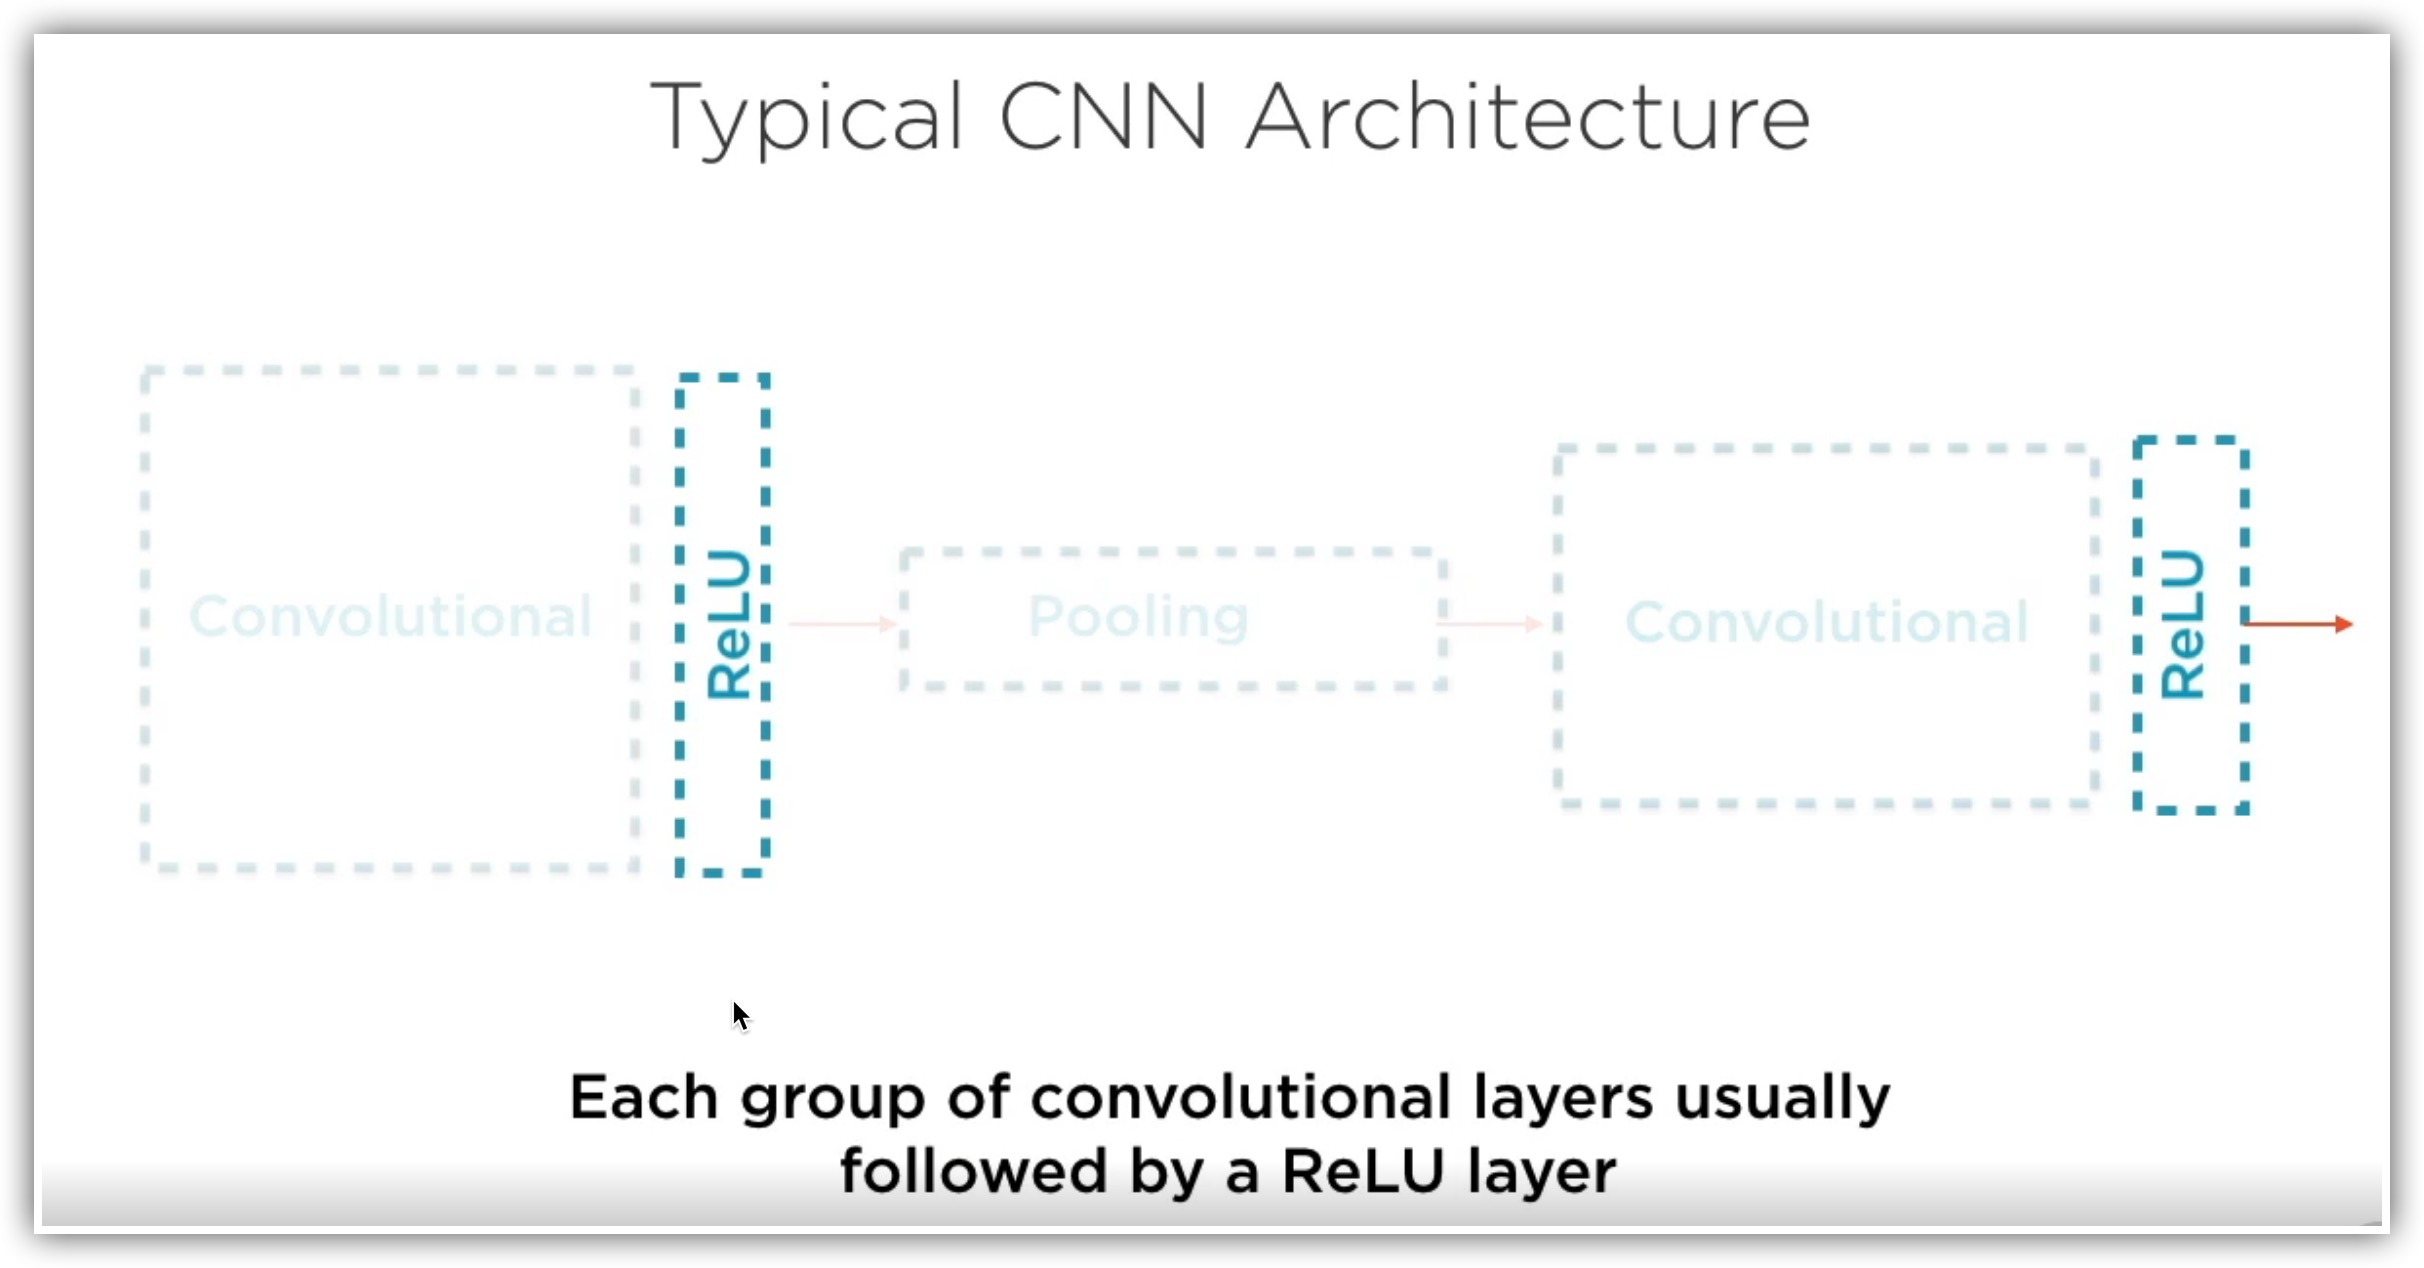

In [4]:
'''
 The most popular activation function used in a CNN is the ReLU activation. 
 So each group of convolutional layers is usually followed by a ReLU activation layer. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-00-36.jpg')

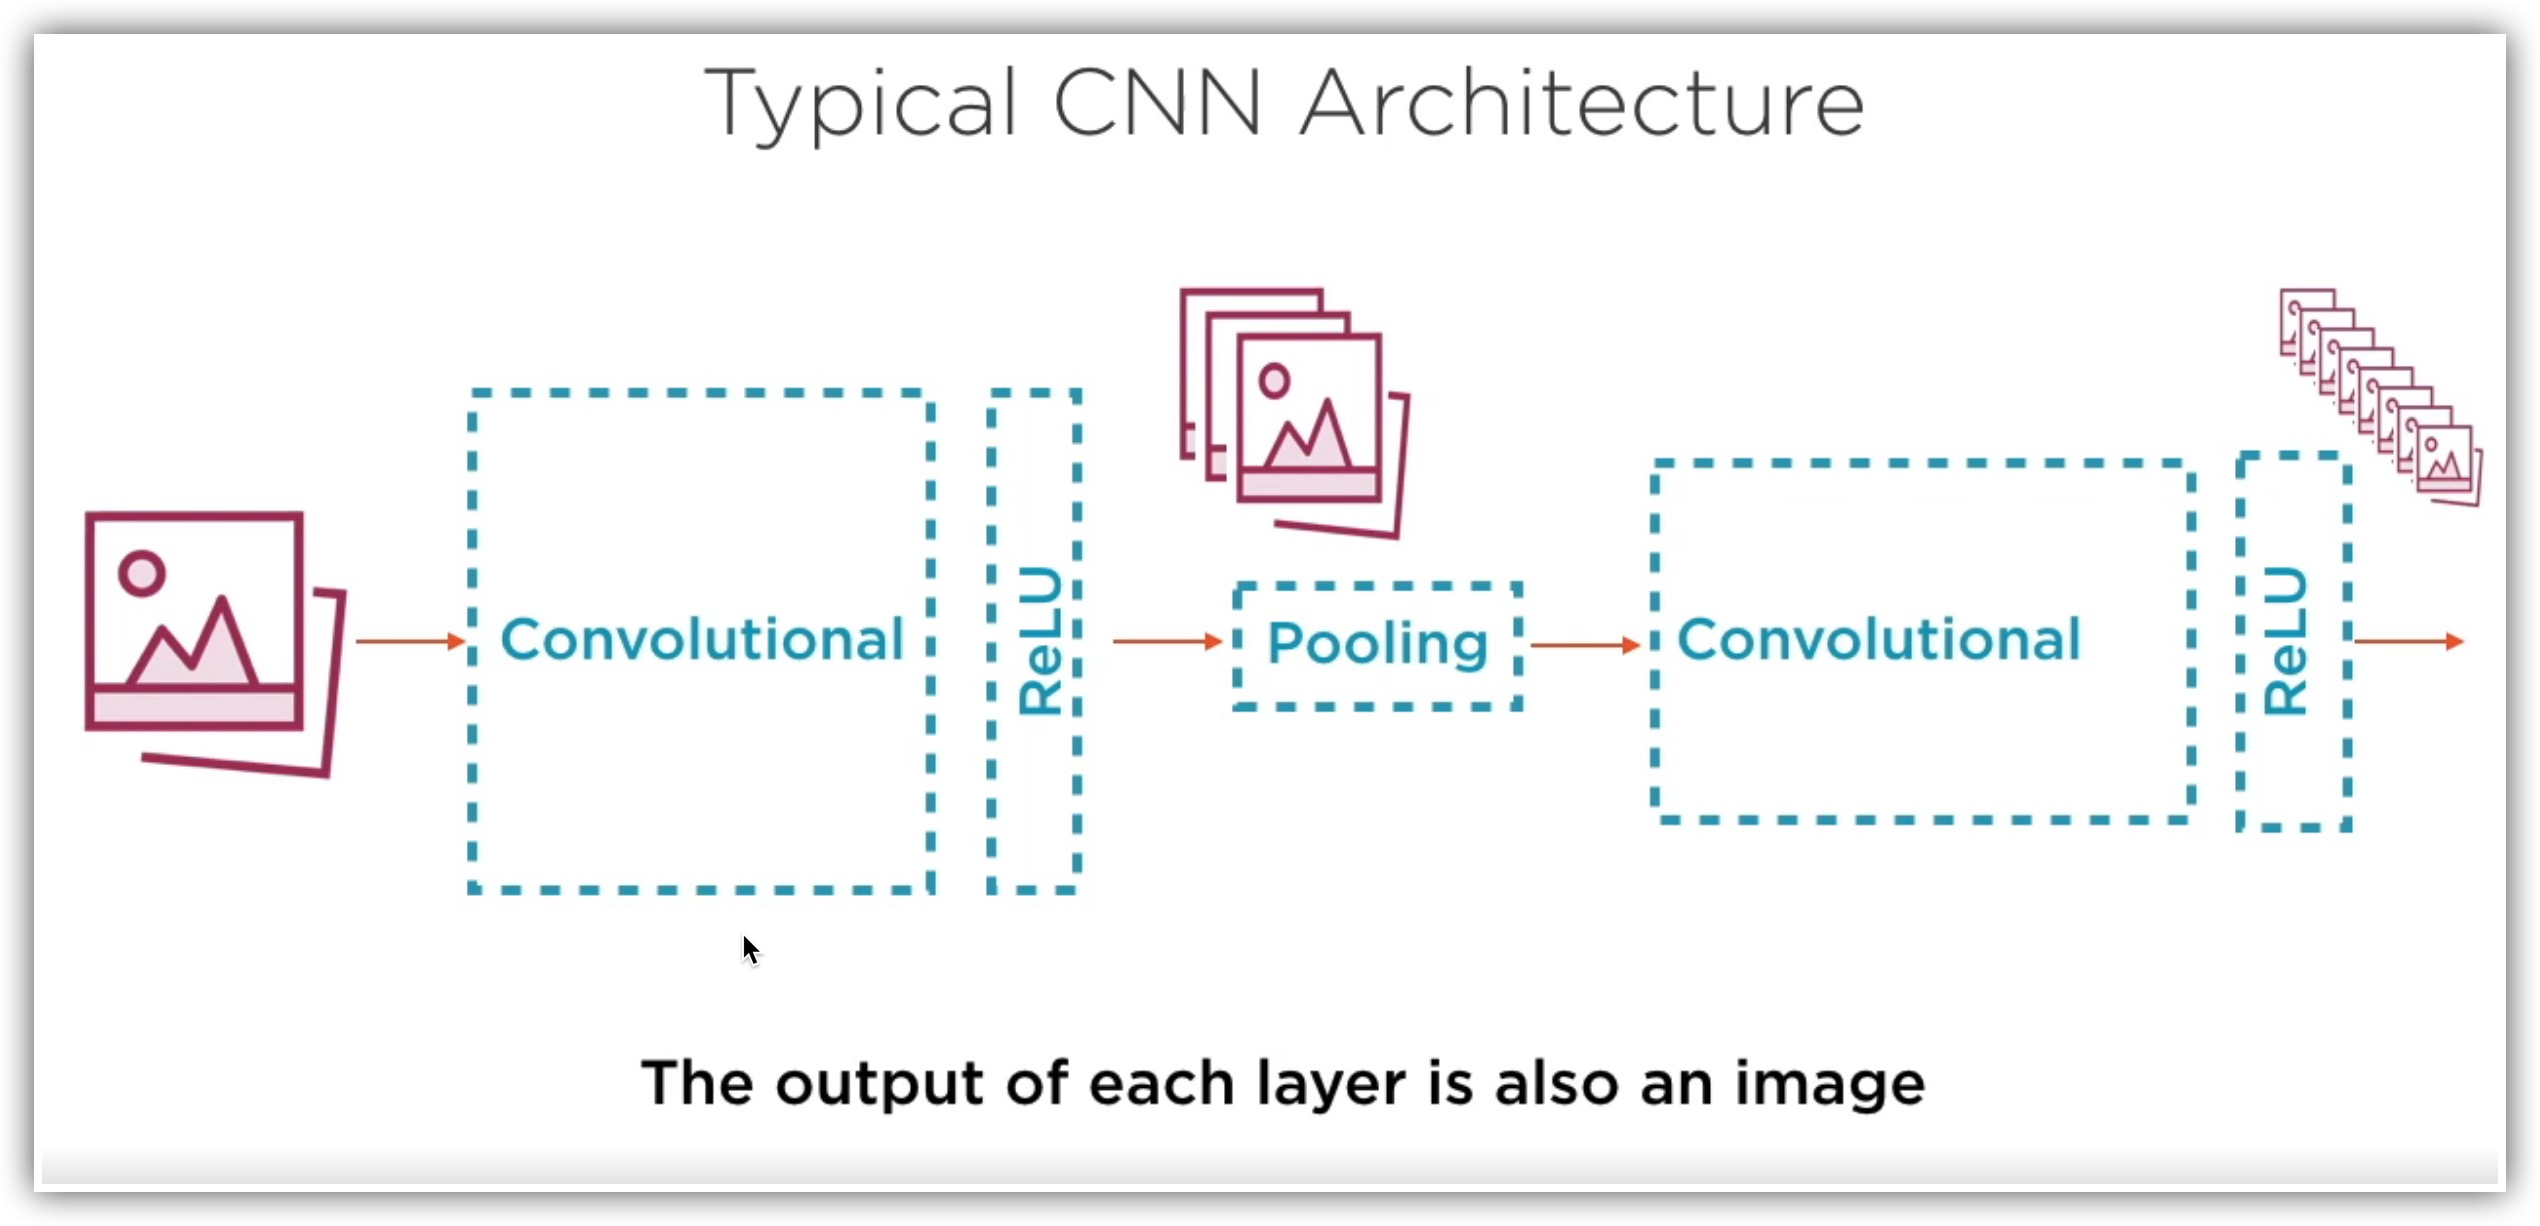

In [5]:
'''
The input to a convolutional neural network and the input to each layer of a 
convolutional neural network is an image. 

That's because the output of each of these layers, whether they are convolutional 
layers or pooling layers, are also images. 
 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-01-40.jpg')

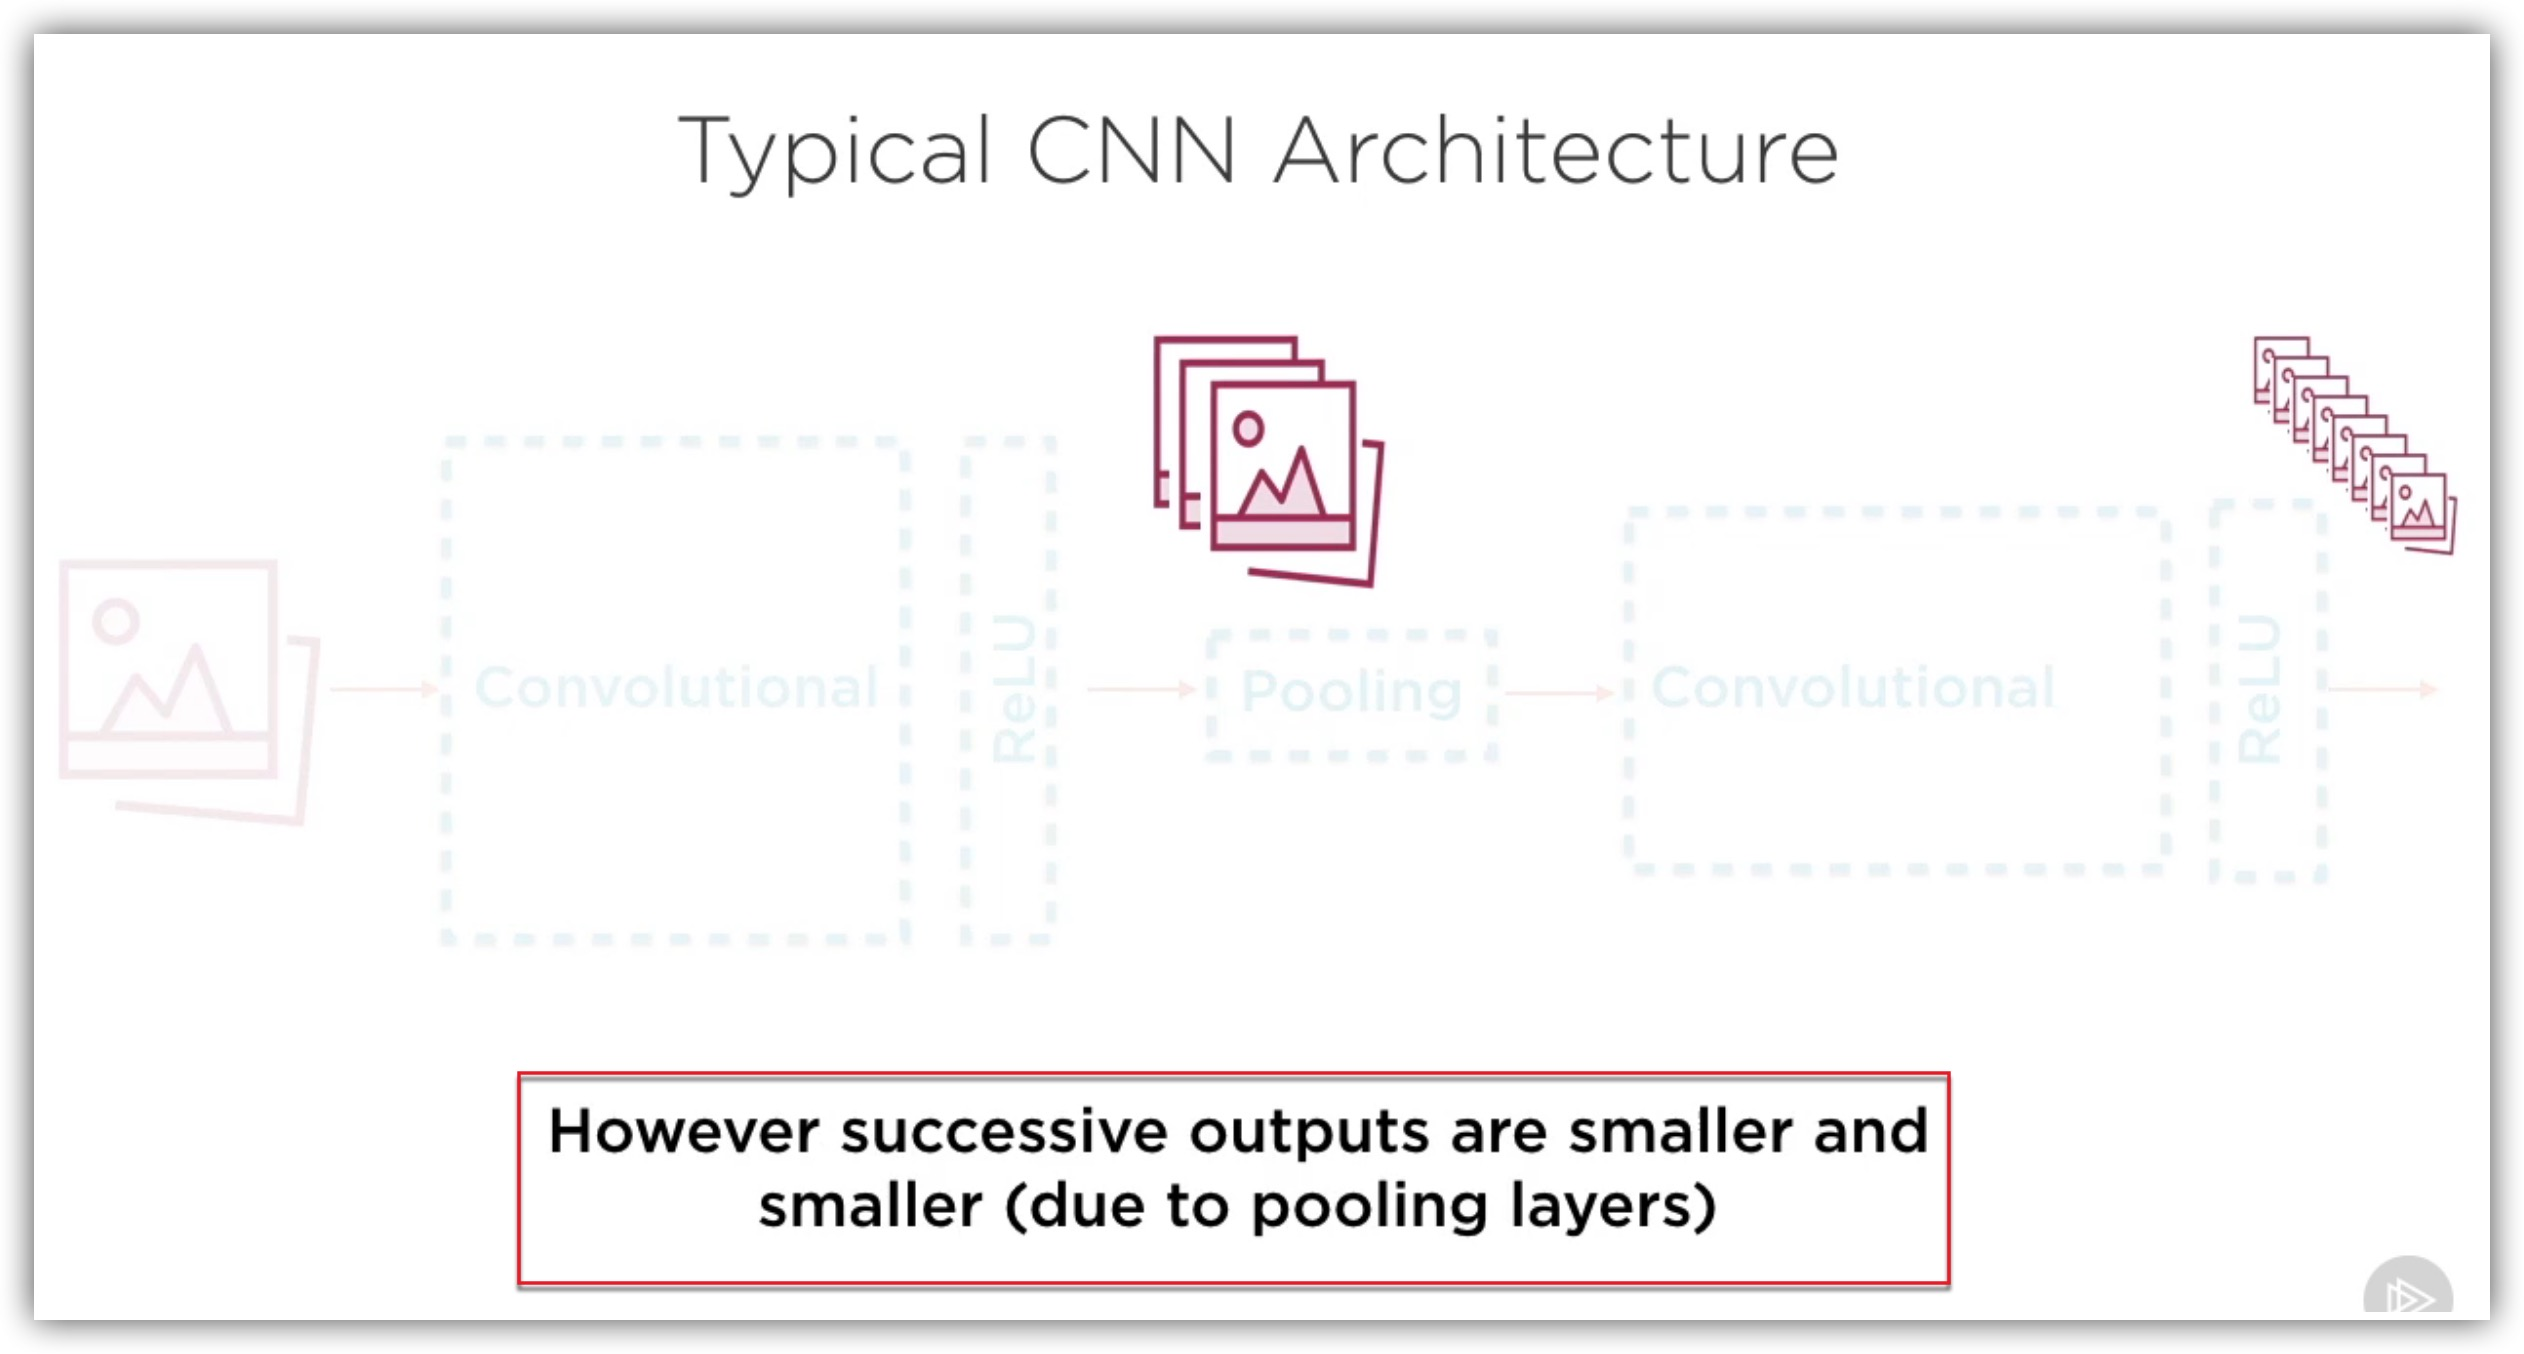

In [6]:
'''
As your input image passes through the convolutional neural network and gets 
transformed by convolutional and pooling layers, your image becomes smaller and smaller. 

This is because of the aggregation operations that are performed in the pooling layers.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-02-59.jpg')

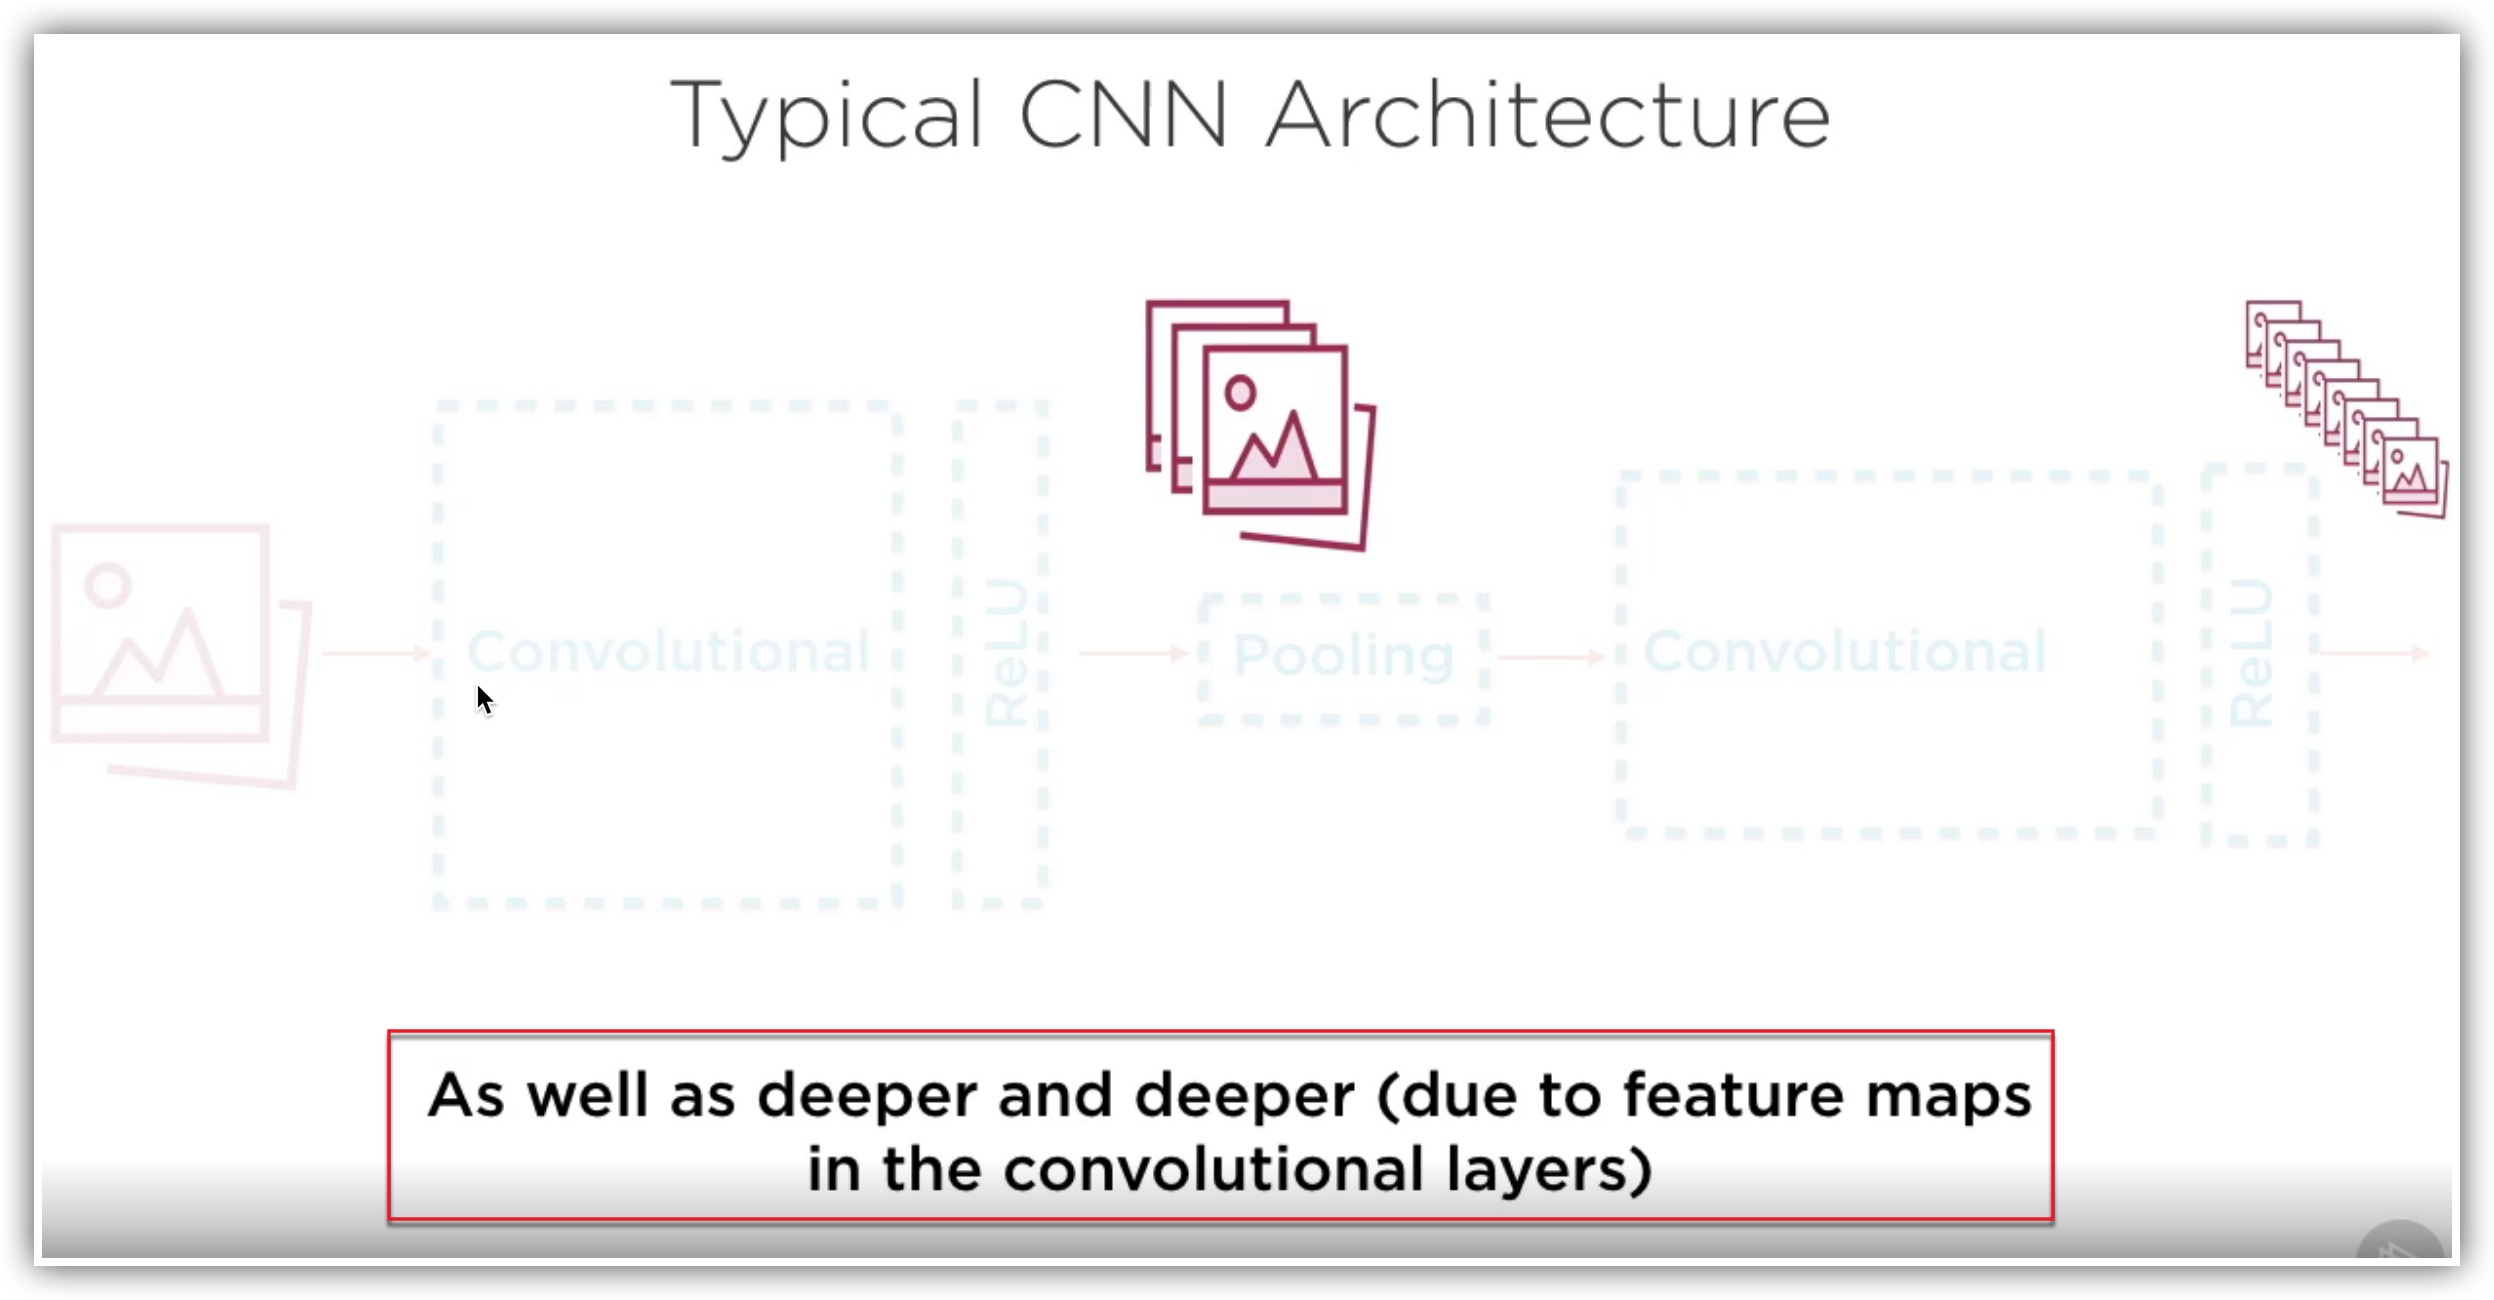

In [7]:
'''
Your images also become deeper and deeper as more and more feature maps are generated 
thanks to the convolutional layers.

So you may start with a single channel gray‑scale image or a multi‑channel RGB image, but at the 
end of the convolutional and pooling layers, you'll have a much smaller image in terms of height and width, 
but a much deeper image in terms of the number of feature maps that your image has. 
'''

Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-04-37.jpg')

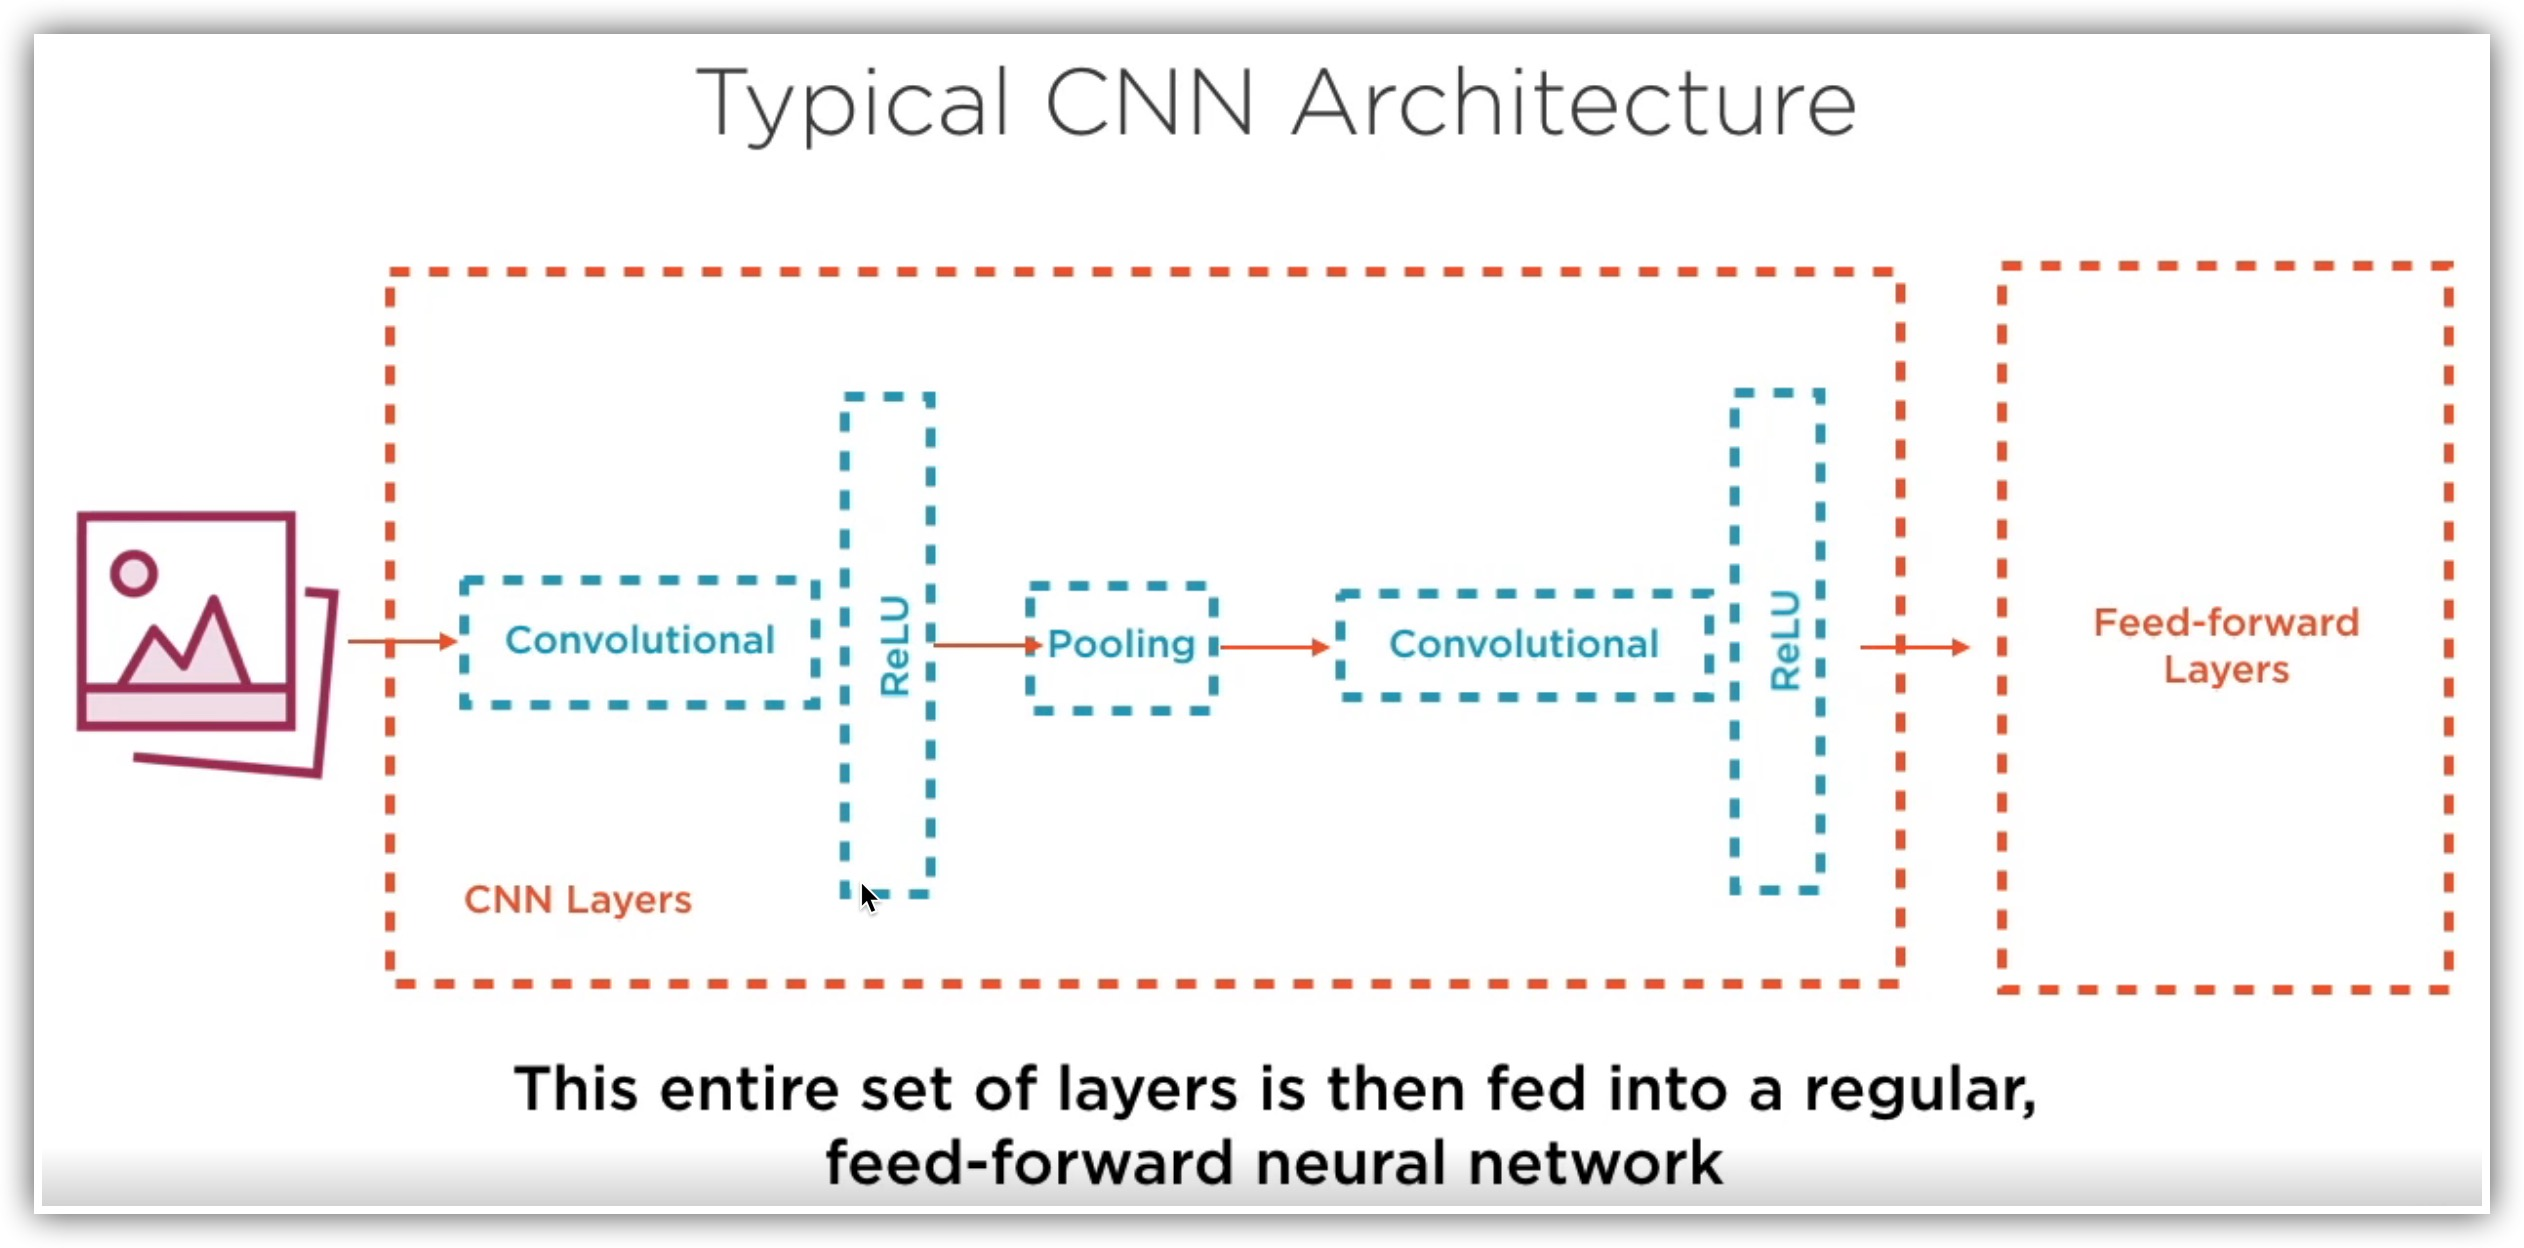

In [9]:
'''
The output generated by convolutional and pooling layers is then fed into a regular feed‑forward neural network. 
This is a dense neural network with linear layers and activation functions. 

The output of the convolutional and pooling layers are in two dimensions in terms of feature maps. 

These feature maps are flattened and then passed into the feed‑forward network.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-07-25.jpg')

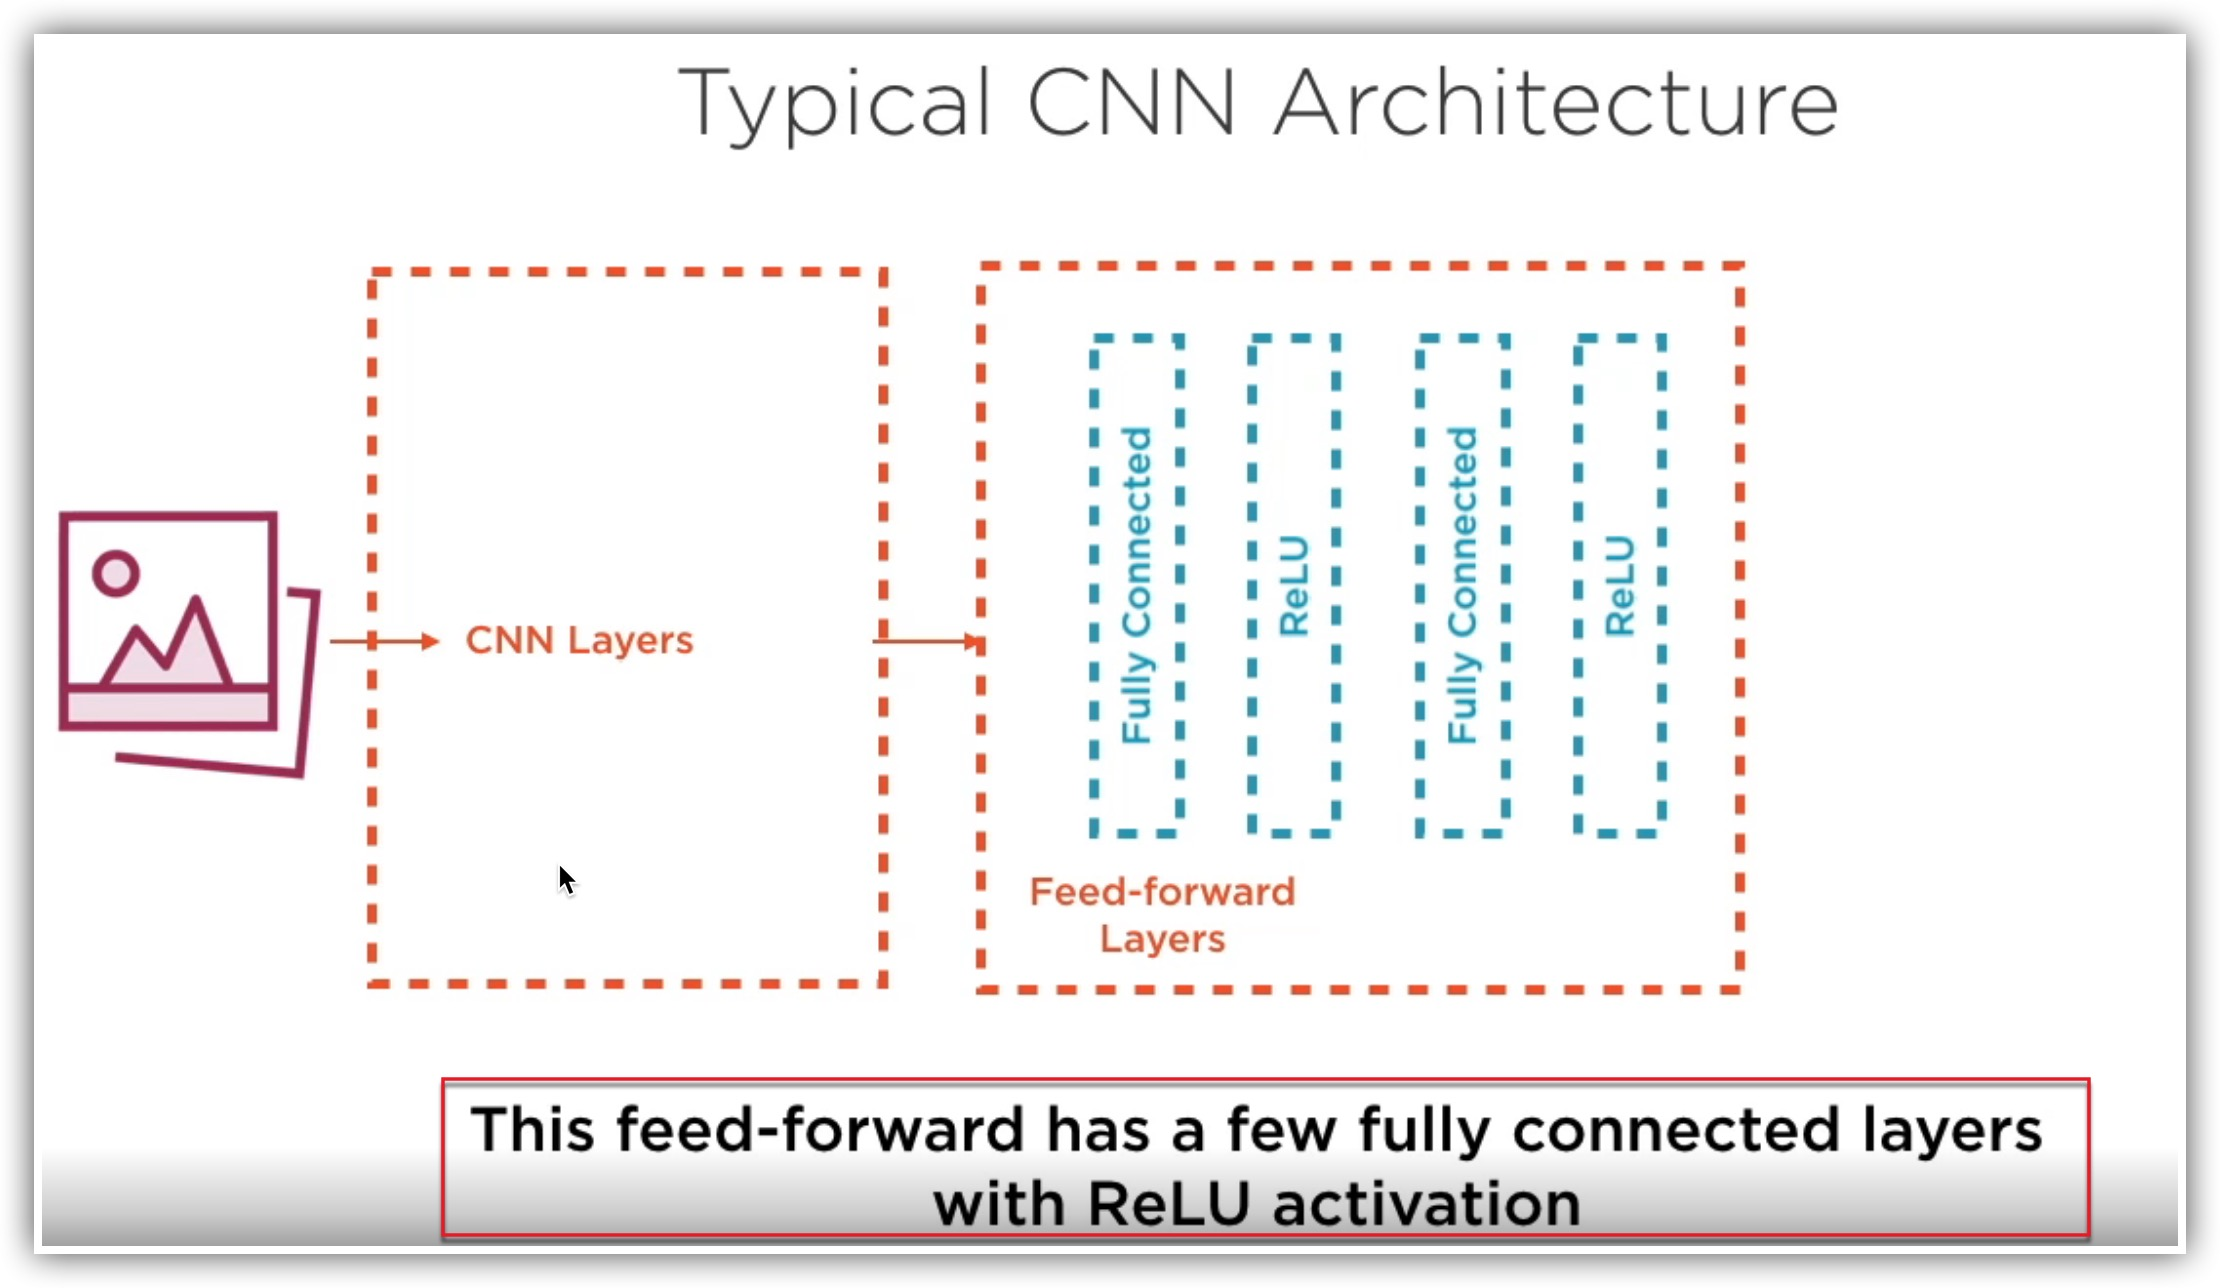

In [10]:
'''
The feed‑forward network typically consists of dense fully connected layers using ReLU activation. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-08-39.jpg')

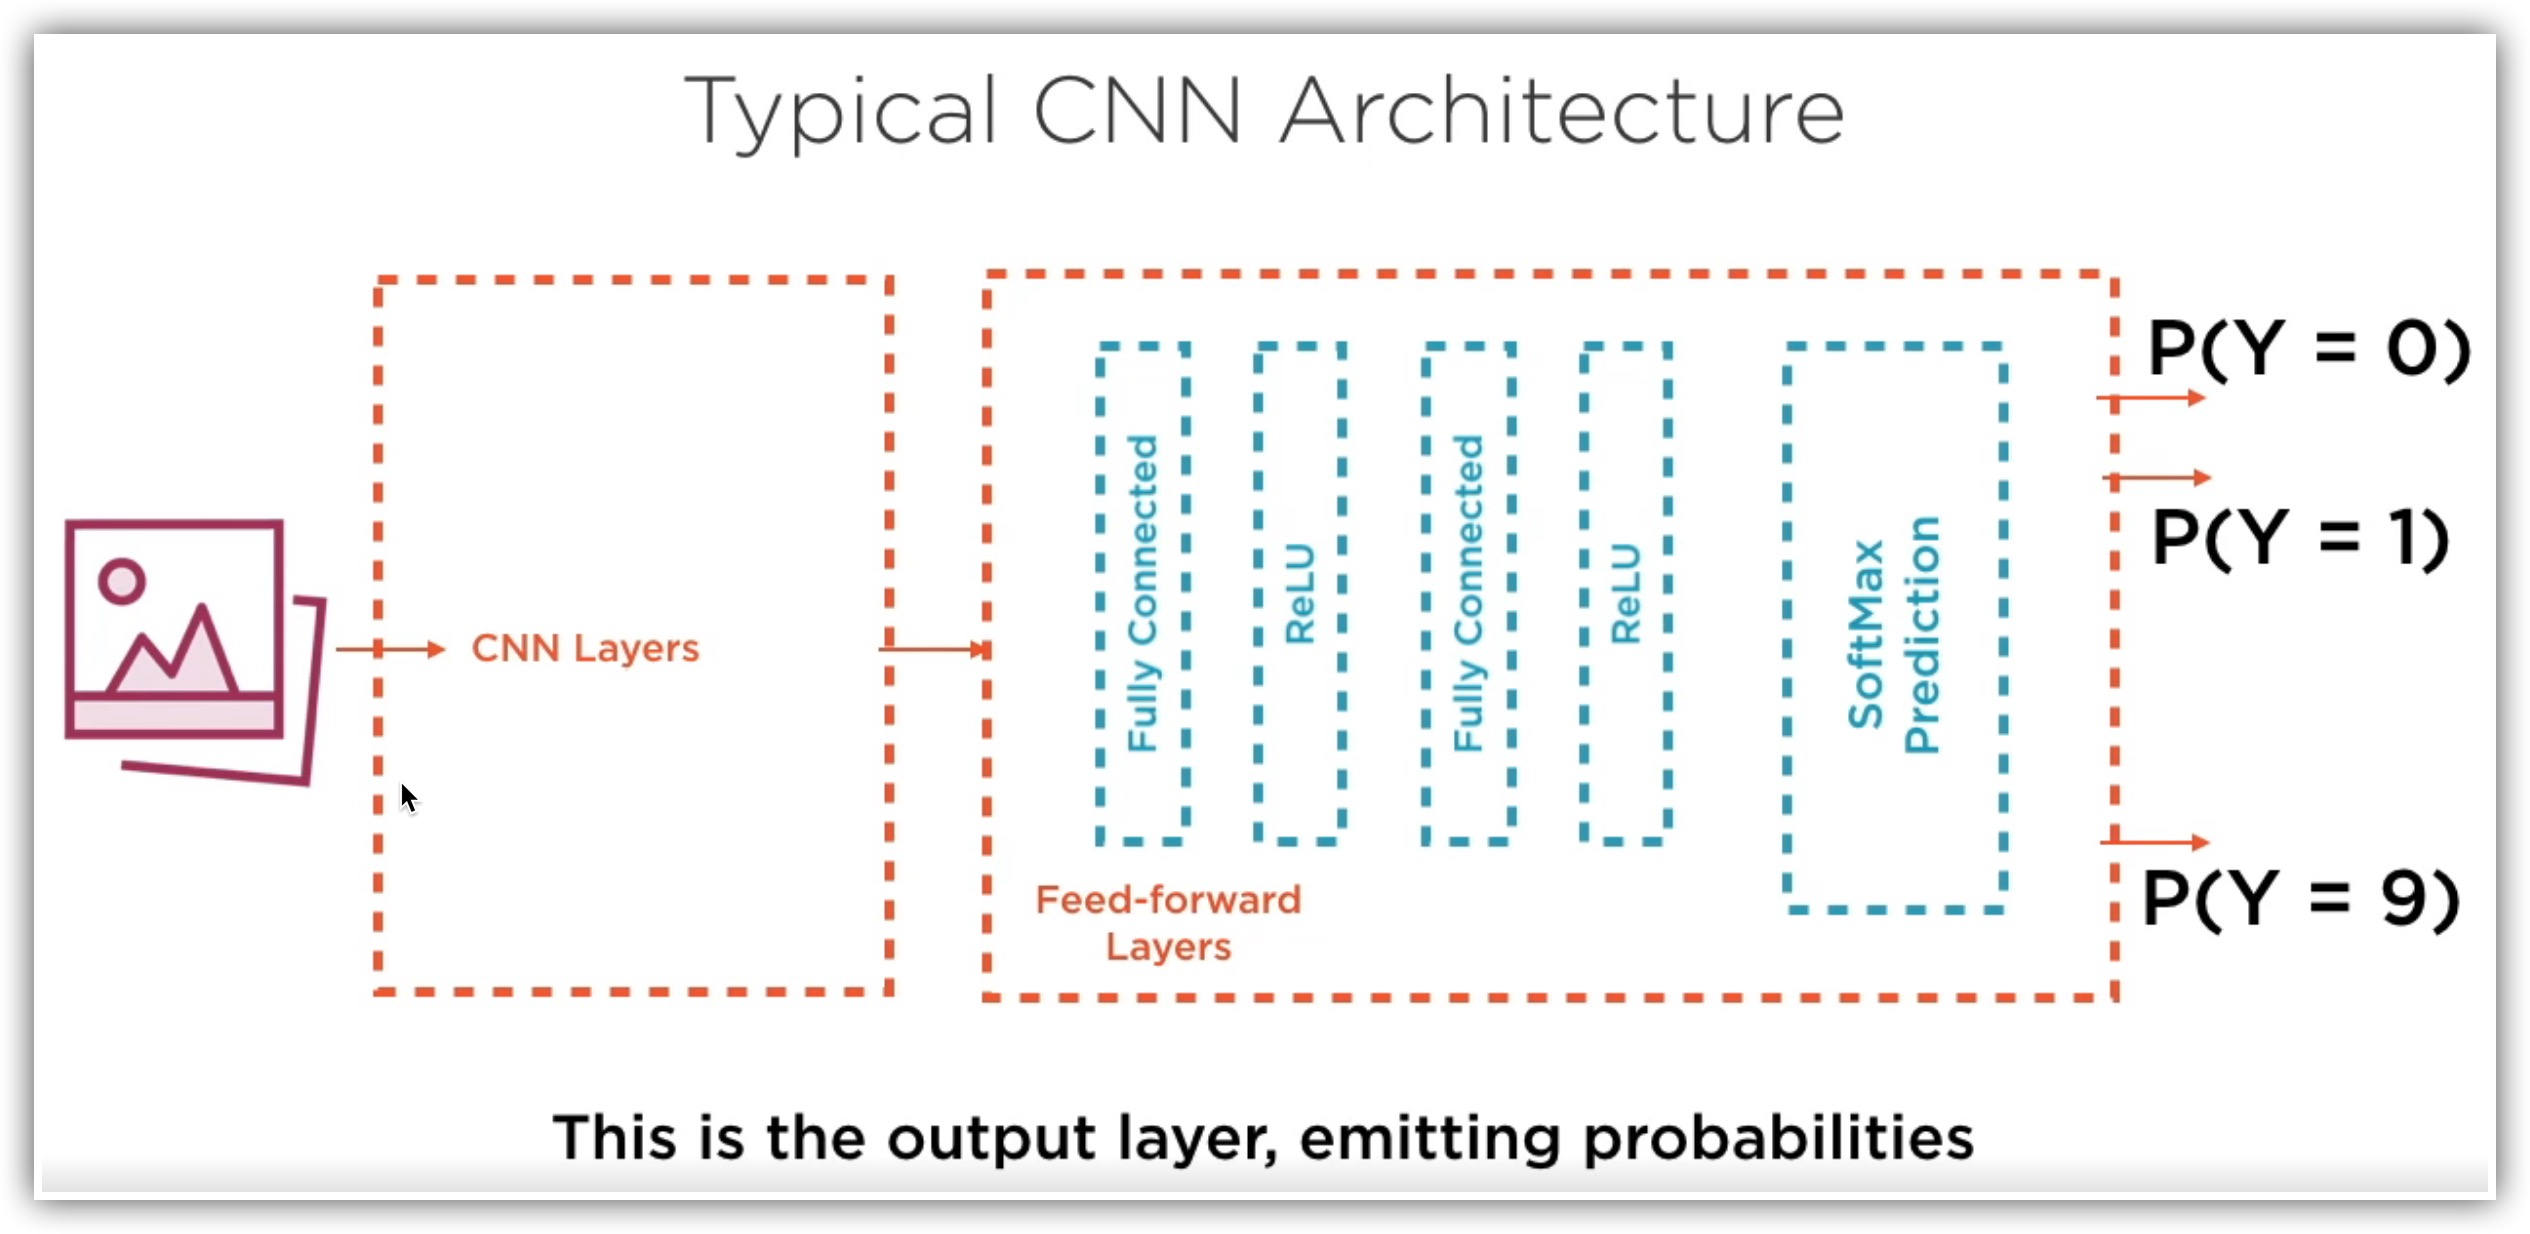

In [11]:
'''
The final layer in the convolutional neural network is a prediction layer, 
and a standard activation function for prediction is the SoftMax function, which can be used 
with multiple classes or categories.

When used with image classification problems, this final output layer emits the probability 
that a particular image belongs to a particular class or category. 

So if you consider a convolutional neural network meant for image classification, 
the input is an image, the outputs are probabilities corresponding to the 
classes or categories associated with that image.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-09-35.jpg')

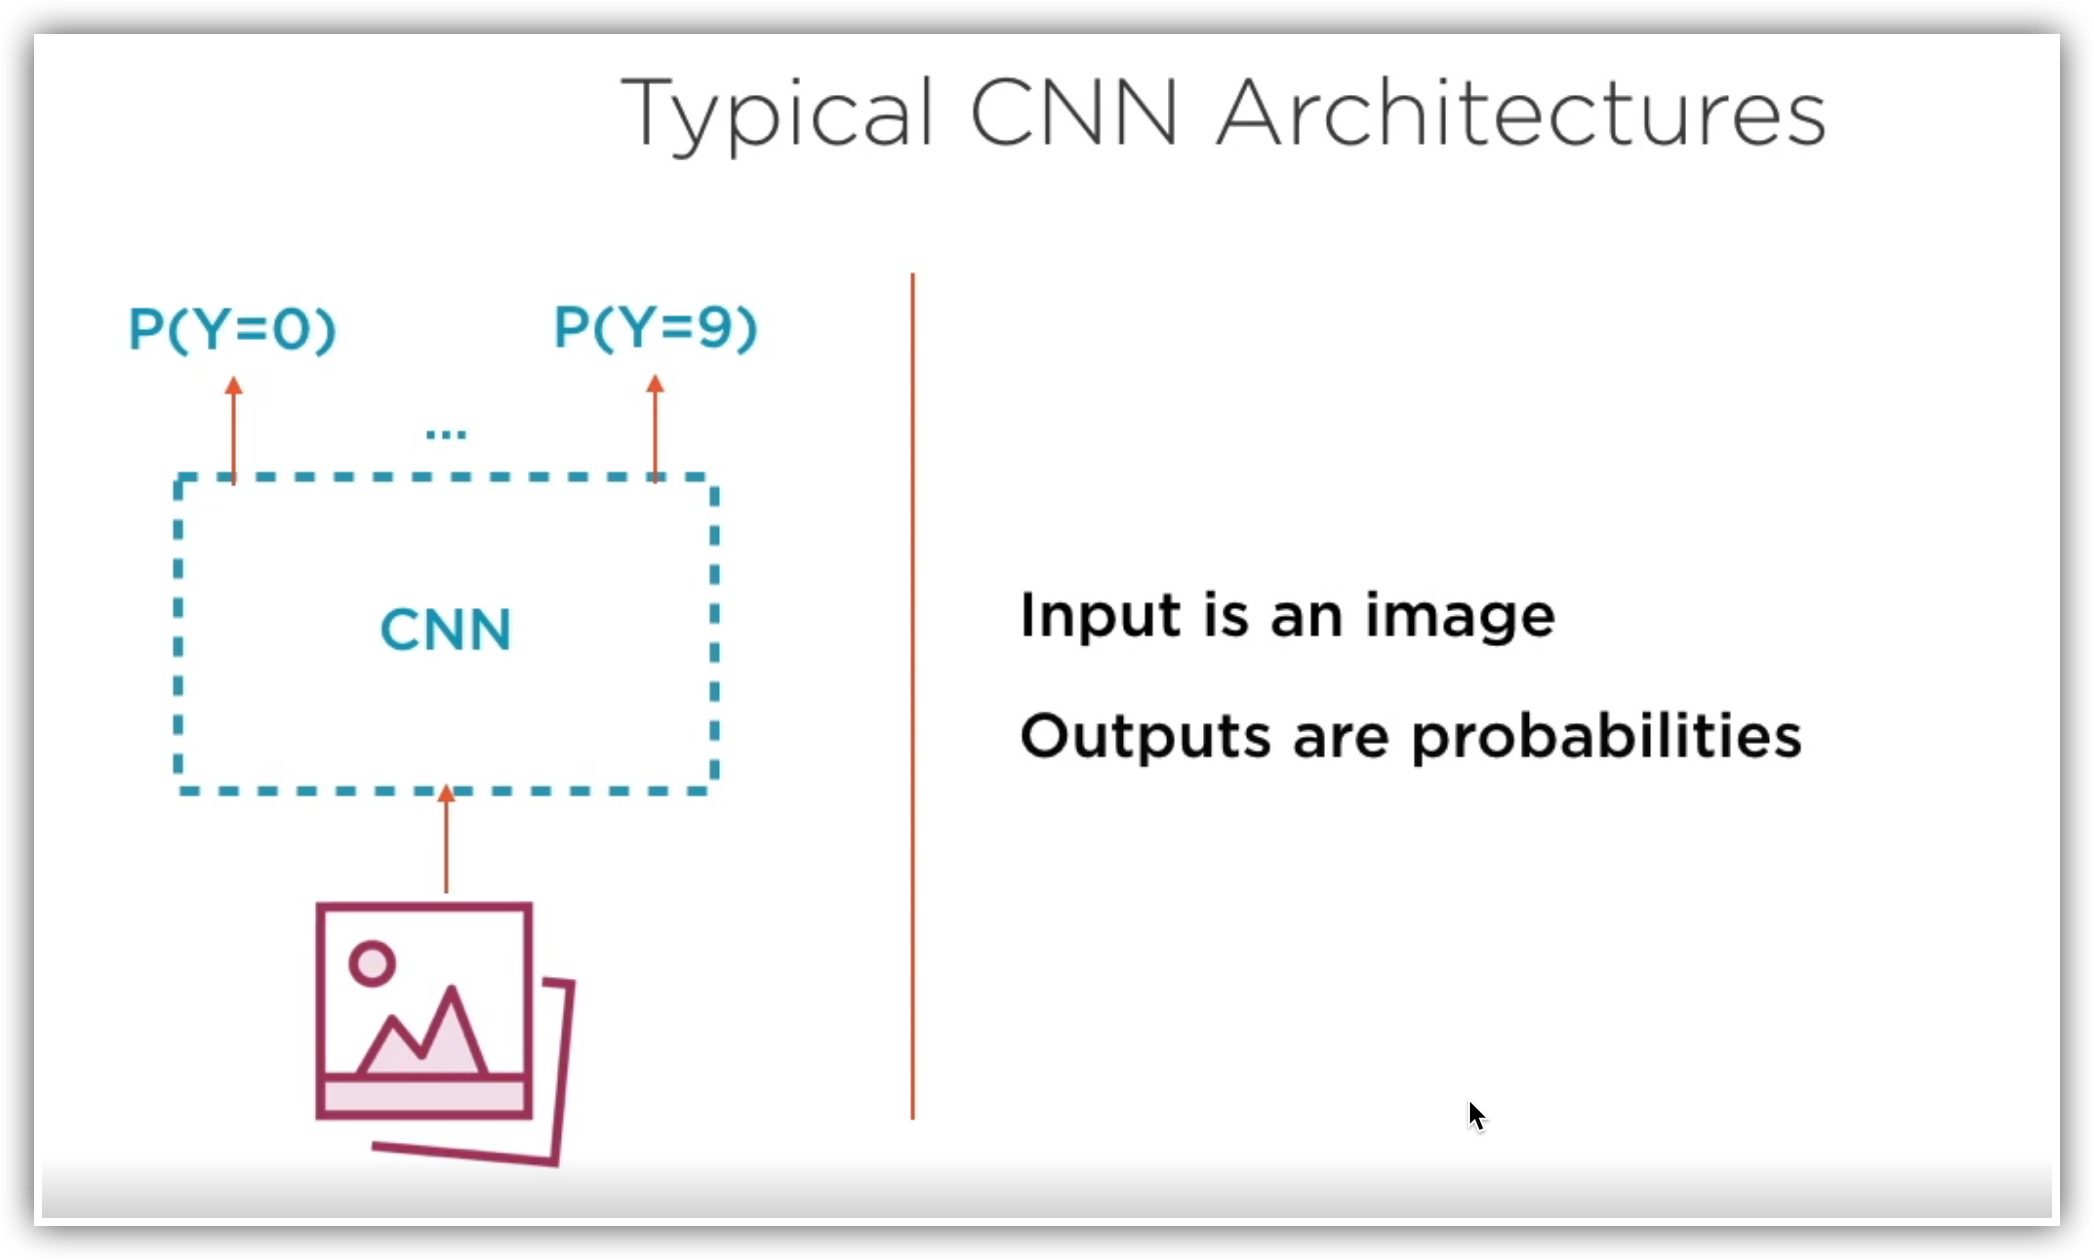

In [12]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-06-01_21-11-32.jpg')